In [ ]:
# using Pkg; Pkg.add("PyPlot")
using LinearAlgebra
using PyPlot

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1260


Define the functions and change of variable formula, where $z\in(-\infty, \infty)$ and $x\in (-1, 1)$.

In [ ]:
z(x) = 2x/(1-x^2)
f(z) =1/(1 + z^2)

f (generic function with 1 method)

In [ ]:
# Define a function to return the polynomial(as as function)
function Interpolate(f::Function,x_nodes::Any)
    # f: The function to interpolate
    # x_nodes: the given nodes for interpolation
    
    # n: the number of nodes
    n=length(x_nodes);
    
    # Calculate coeffiencts of the polynomial
    A=zeros(n,n);
    for i=1:n
        A[:,i] = x_nodes.^(n-i)
    end
    c = A\f.(x_nodes);
    
    # Construct the polynomial
    function p_inter(x)
        p=0;
        for i=1:n
            p += c[i]*x^(n-i)
        end
        return p
    end
    
    # retunrs the polynomial(as a function)
    return p_inter
end

Interpolate (generic function with 1 method)

In [ ]:
# A function for plotting f, and the interpolated polynomial p
function PlotInterpolation(f::Function, p::Function,x_nodes::Any,nd=0::Int,
        labels=["f(x)","p(x)"]::Array{String,1},l=1000::Int)
    # f: The function to interpolate
    # p: The polynomial interpolation
    # x_nodes: the given nodes to interpolate
    # nd: there are 'n+1' nodes if set to 0, 'n' nodes otherwise. Just affect the title of the plot.
    # labels: The labels of the function and polynomial as a vector of two strings
    # l: length of linspace
    
    # n: number of nodes
    n=length(x_nodes);
    
    # Construct the linspace
    n10 = 10*n;
    xl = cos.(((1:n10).-0.5)*pi/(n10));
#    xl=range(-1,step=(pi/n)/20,stop=1);
    
    #Plot the functions
    plot(z.(xl), f.(xl),label=labels[1]);
    plot(z.(xl), p.(xl),label=labels[2]);
    plot(z.(x_nodes),f.(x_nodes),"or");
    plt.legend();
    xscale("log")
    if nd==0
        plt.title("n=$(n-1)");
    else
        plt.title("n=$(n)")
    end
    println("Max. error=",maximum(abs.(p.(xl)-f.(xl))));
end

PlotInterpolation (generic function with 4 methods)

In [ ]:
# a function that construct n Chebyshev nodes of the first kind and plot the interpolating polynomial
function ChebyshevNodes1(f::Function , n::Int)
    # f: The function to interpolate
    # n: The number of nodes
    
    # Construct n Chebyshev Nodes of the first kind on [-1,1]
    x_nodes = cos.(((1:n).-0.5)*pi/(n));
    
    # use defined functions to plot
    p = Interpolate(f,x_nodes);
    PlotInterpolation(f,p,x_nodes,1);
end

ChebyshevNodes1 (generic function with 1 method)

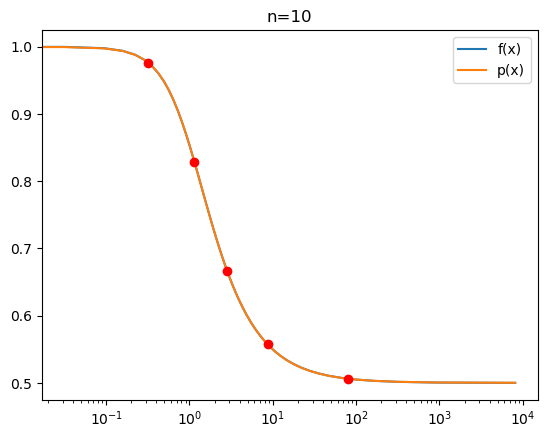

Max. error=0.00029362019578194065


In [ ]:
n=10
ChebyshevNodes1(f,n);

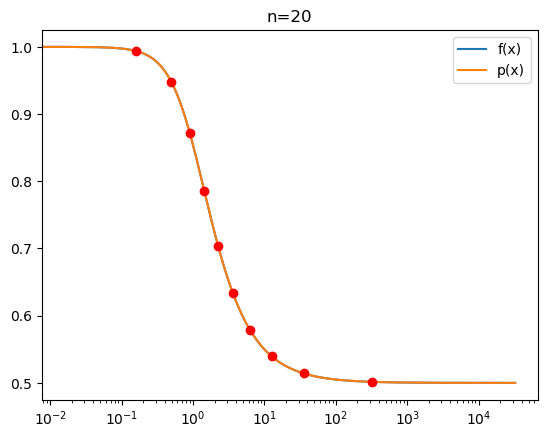

Max. error=4.366258332666462e-8


In [ ]:
n=20;
ChebyshevNodes1(f,n);

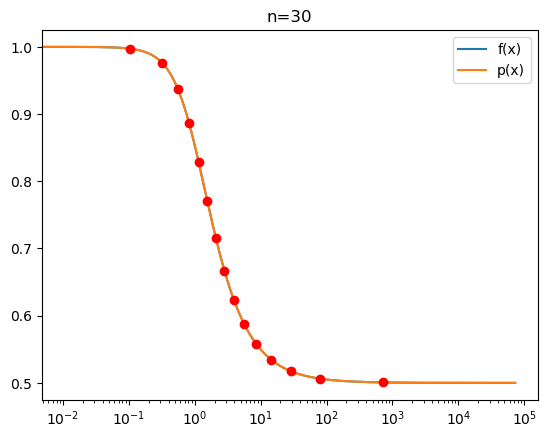

Max. error=6.491585047285753e-12


In [ ]:
n=30;
ChebyshevNodes1(f,n);

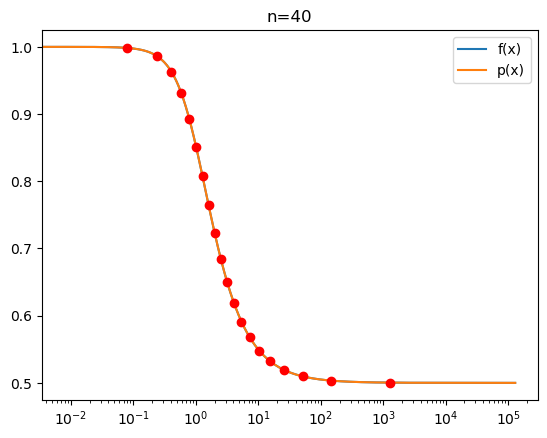

Max. error=1.3322676295501878e-15


In [ ]:
n=40;
ChebyshevNodes1(f,n);

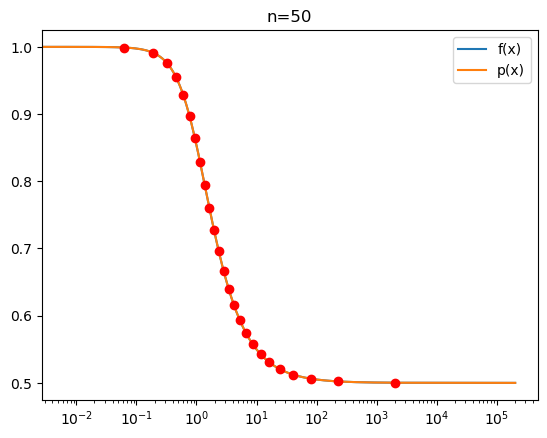

Max. error=1.532107773982716e-14


In [ ]:
n=50;
ChebyshevNodes1(f,n);

In [ ]:
# A function for plotting f, and the interpolated polynomial p
function PlotAbsError(f::Function, p::Function,x_nodes::Any,nd=0::Int,l=1000::Int)
    # f: The function to interpolate
    # p: The polynomial interpolation
    # x_nodes: the given nodes to interpolate
    # nd: there are 'n+1' nodes if set to 0, 'n' nodes otherwise. Just affect the title of the plot.
    # labels: The labels of the function and polynomial as a vector of two strings
    # l: length of linspace
    
    # n: number of nodes
    n=length(x_nodes);
    
    # Construct the linspace
    n10 = 100*n;
    xl = cos.(((1:n10).-0.5)*pi/(n10));
    
    #Plot the functions
    plot(z.(xl), abs.(f.(xl)-p.(xl)),label="n=$(n)"); 
end

PlotAbsError (generic function with 4 methods)

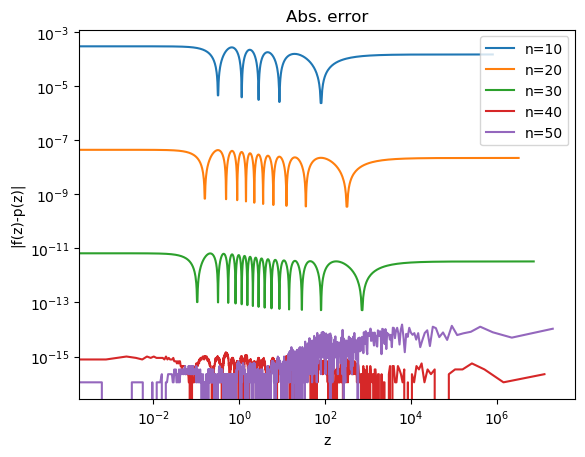

In [ ]:
for n in 10:10:50
    x_nodes = cos.(((1:n).-0.5)*pi/(n));
    p = Interpolate(f,x_nodes);
    PlotAbsError(f,p,x_nodes,1);
end
xlabel("z");
ylabel("|f(z)-p(z)|");
xscale("log")
yscale("log")
plt.legend()
title("Abs. error");